In [7]:
import os
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Parse datetime
df['Date_Time'] = pd.to_datetime(df['Date_Time'], format="%m/%d/%Y %H:%M:%S")
df = df.sort_values('Date_Time').reset_index(drop=True)

# Time features
df['date'] = df['Date_Time'].dt.date
df['year'] = df['Date_Time'].dt.year
df['month'] = df['Date_Time'].dt.month
df['month_name'] = df['Date_Time'].dt.strftime("%b")
df['day'] = df['Date_Time'].dt.day
df['hour'] = df['Date_Time'].dt.hour
df['minute'] = df['Date_Time'].dt.minute
df['weekday'] = df['Date_Time'].dt.weekday  # Monday=0
df['weekday_name'] = df['Date_Time'].dt.strftime("%a")
df['weekofyear'] = df['Date_Time'].dt.isocalendar().week.astype(int)



In [3]:
# Spatial features
df['lat_round'] = df['Lat'].round(3)
df['lon_round'] = df['Lon'].round(3)



In [8]:
# Simple hotspot id by rounded coords
df['hotspot'] = df['lat_round'].astype(str) + "_" + df['lon_round'].astype(str)



In [5]:
# Basic checks
print("Date range:", df['Date_Time'].min(), "to", df['Date_Time'].max())
print("Unique bases:", df['Base'].nunique())
print("Sample rows:\n", df.head())



Date range: 2014-04-01 00:00:00 to 2014-09-30 22:59:00
Unique bases: 5
Sample rows:
             Date_Time      Lat      Lon    Base        date  year  month  \
0 2014-04-01 00:00:00  40.7188 -73.9863  B02598  2014-04-01  2014      4   
1 2014-04-01 00:00:00  40.7215 -73.9952  B02682  2014-04-01  2014      4   
2 2014-04-01 00:00:00  40.7637 -73.9600  B02598  2014-04-01  2014      4   
3 2014-04-01 00:01:00  40.7355 -73.9966  B02617  2014-04-01  2014      4   
4 2014-04-01 00:02:00  40.7184 -73.9601  B02682  2014-04-01  2014      4   

  month_name  day  hour  minute  weekday weekday_name  weekofyear  lat_round  \
0        Apr    1     0       0        1          Tue          14     40.719   
1        Apr    1     0       0        1          Tue          14     40.722   
2        Apr    1     0       0        1          Tue          14     40.764   
3        Apr    1     0       1        1          Tue          14     40.736   
4        Apr    1     0       2        1          Tue     

In [6]:
# Helper to save figures
def save_fig(fig, name):
    path = os.path.join(OUT_DIR, f"{name}.png")
    fig.savefig(path, bbox_inches="tight", dpi=140)
    plt.show()
    plt.close(fig)



### Analysis 1: How many total trips in dataset
 (insight: dataset size / volume)

In [9]:
print("Analysis 1: Total trips =", len(df))

Analysis 1: Total trips = 4534327


### Analysis 2: Trips by hour of day (where are peak hours?)

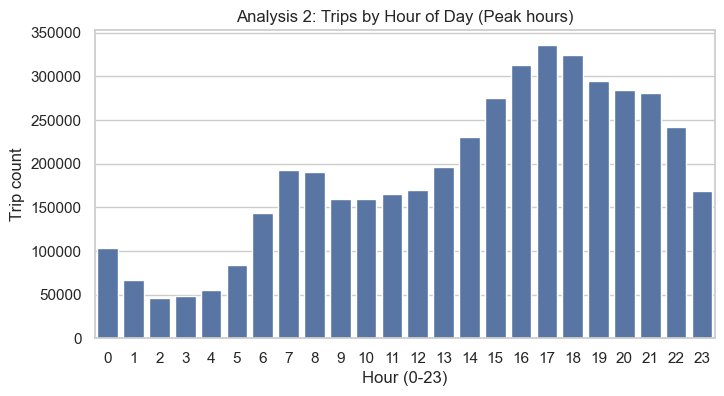

In [10]:
fig = plt.figure(figsize=(8,4))
order = list(range(0,24))
sns.countplot(x='hour', data=df, order=order)
plt.title("Analysis 2: Trips by Hour of Day (Peak hours)")
plt.xlabel("Hour (0-23)"); plt.ylabel("Trip count")
save_fig(fig, "02_trips_by_hour")

### Analysis 3: Trips by weekday

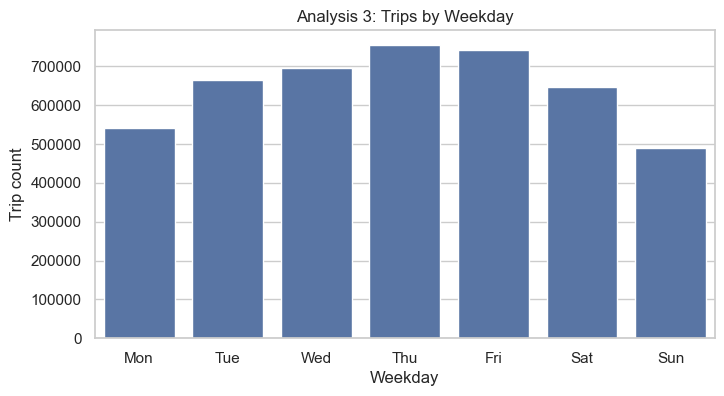

In [11]:
fig = plt.figure(figsize=(8,4))
order_wd = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sns.countplot(x='weekday_name', data=df, order=order_wd)
plt.title("Analysis 3: Trips by Weekday")
plt.xlabel("Weekday"); plt.ylabel("Trip count")
save_fig(fig, "03_trips_by_weekday")

### Analysis 4: Hour vs Weekday heatmap (hourly pattern through week)

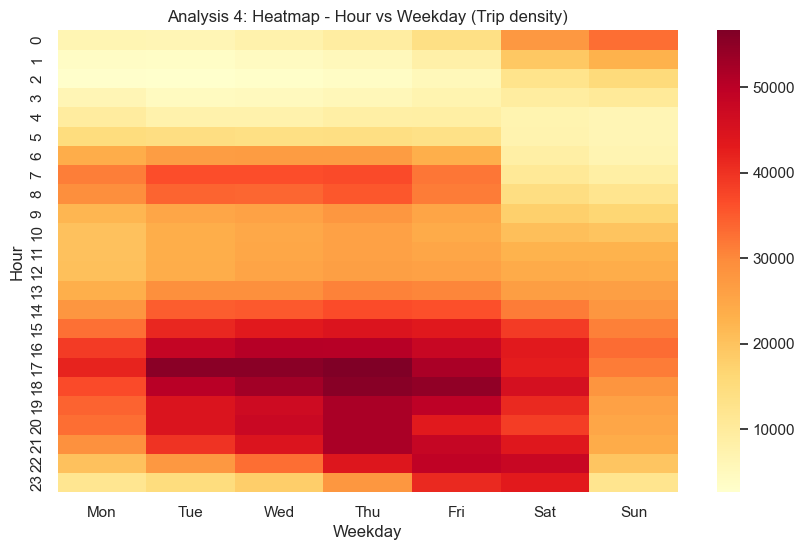

In [12]:
pivot = df.pivot_table(index='hour', columns='weekday_name', values='Base', aggfunc='count').reindex(index=range(0,24), columns=order_wd)
fig = plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap="YlOrRd")
plt.title("Analysis 4: Heatmap - Hour vs Weekday (Trip density)")
plt.xlabel("Weekday"); plt.ylabel("Hour")
save_fig(fig, "04_heatmap_hour_weekday")

### Analysis 5: Trips by month

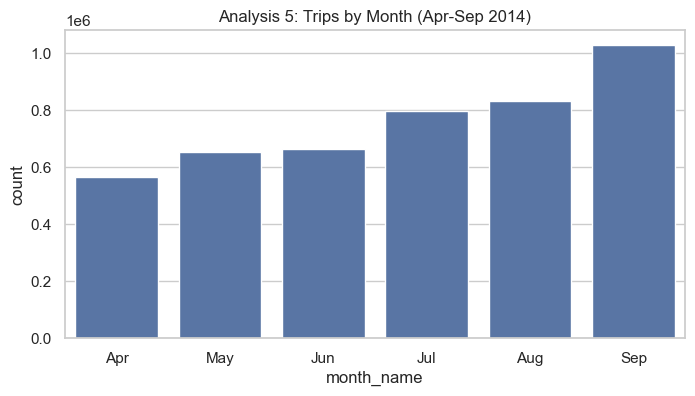

In [13]:
fig = plt.figure(figsize=(8,4))
order_month = ['Apr','May','Jun','Jul','Aug','Sep']
sns.countplot(x='month_name', data=df, order=order_month)
plt.title("Analysis 5: Trips by Month (Apr-Sep 2014)")
save_fig(fig, "05_trips_by_month")

### Analysis 6: Daily trips time series (trend)

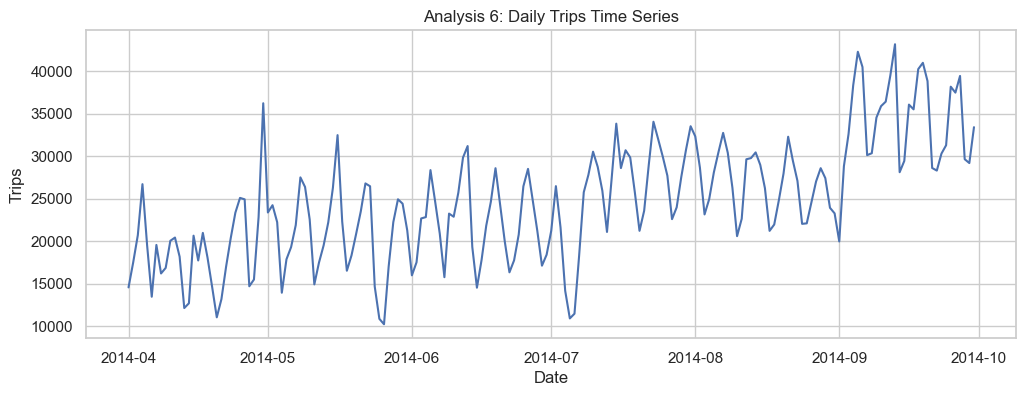

In [14]:
daily = df.groupby('date').size()
fig = plt.figure(figsize=(12,4))
daily.plot()
plt.title("Analysis 6: Daily Trips Time Series")
plt.xlabel("Date"); plt.ylabel("Trips")
save_fig(fig, "06_daily_trips_ts")

### Analysis 7: Cumulative trips over time

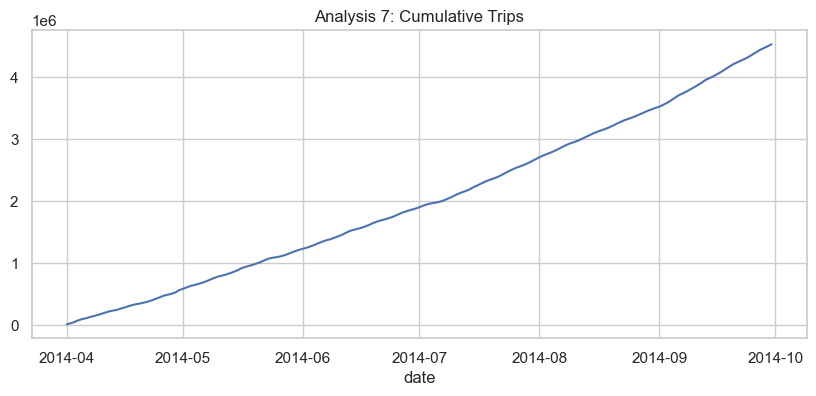

In [15]:
fig = plt.figure(figsize=(10,4))
daily.cumsum().plot()
plt.title("Analysis 7: Cumulative Trips")
save_fig(fig, "07_cumulative_trips")

### Analysis 8: Trip distribution by Base (top bases)

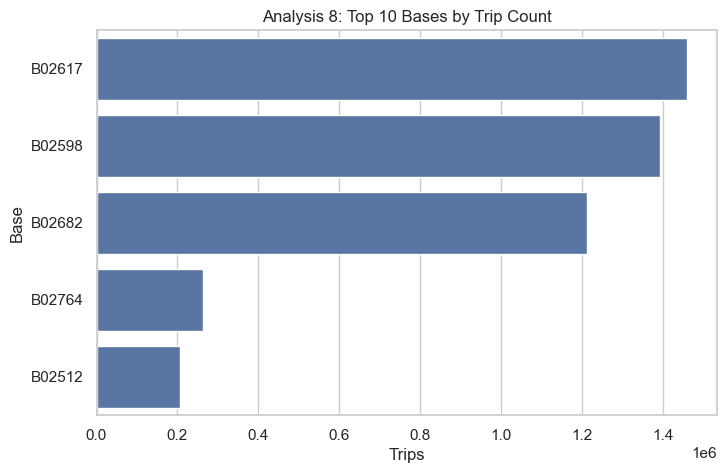

In [16]:
top_bases = df['Base'].value_counts().head(10)
fig = plt.figure(figsize=(8,5))
sns.barplot(x=top_bases.values, y=top_bases.index)
plt.title("Analysis 8: Top 10 Bases by Trip Count")
plt.xlabel("Trips"); plt.ylabel("Base")
save_fig(fig, "08_top_bases")

### Analysis 9: Hourly pattern for top base (example)

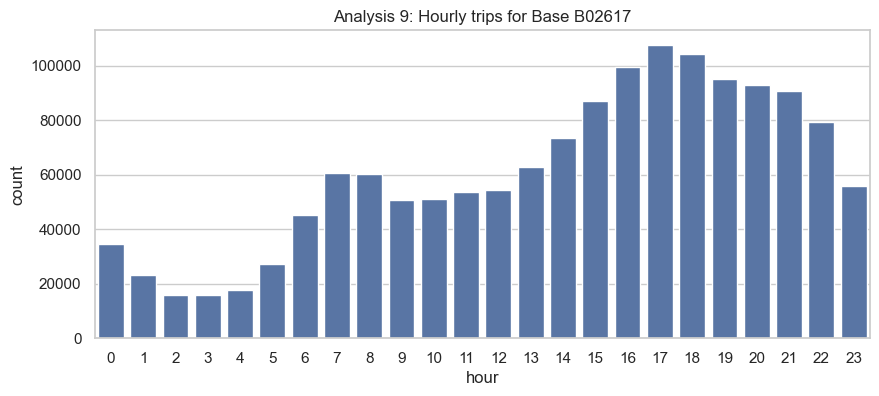

In [17]:
top_base = top_bases.index[0]
fig = plt.figure(figsize=(10,4))
sns.countplot(x='hour', data=df[df['Base']==top_base], order=order)
plt.title(f"Analysis 9: Hourly trips for Base {top_base}")
save_fig(fig, "09_hourly_top_base")

### Analysis 10: Top hotspots by coordinate (rounded)

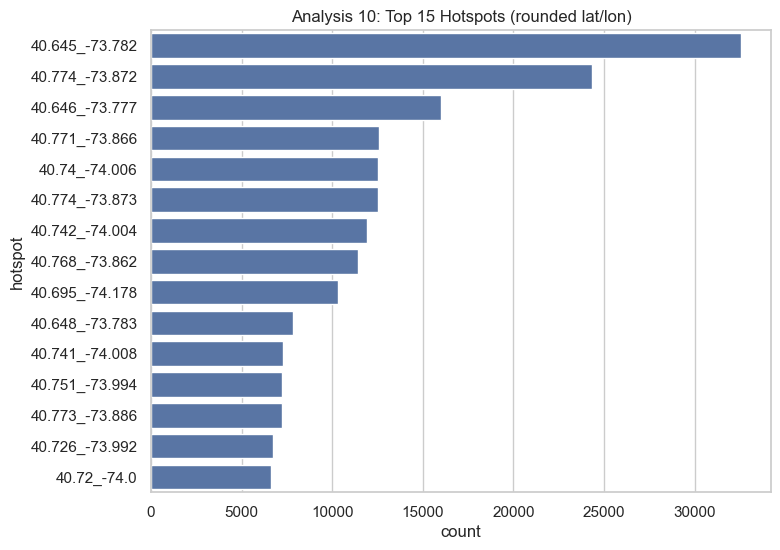

In [18]:
top_hotspots = df['hotspot'].value_counts().head(15)
hotspots_df = top_hotspots.reset_index()
hotspots_df.columns = ['hotspot','count']
fig = plt.figure(figsize=(8,6))
sns.barplot(x='count', y='hotspot', data=hotspots_df)
plt.title("Analysis 10: Top 15 Hotspots (rounded lat/lon)")
save_fig(fig, "10_top_hotspots")

### Analysis 11: Geographical spread — scatter of coordinates (sample for speed)

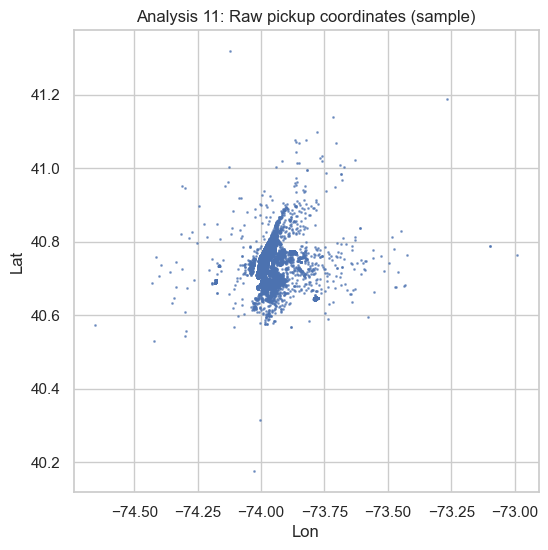

In [19]:
sample = df.sample(n=min(20000, len(df)), random_state=1)
fig = plt.figure(figsize=(6,6))
plt.scatter(sample['Lon'], sample['Lat'], s=1, alpha=0.6)
plt.title("Analysis 11: Raw pickup coordinates (sample)")
plt.xlabel("Lon"); plt.ylabel("Lat")
save_fig(fig, "11_scatter_coords")

### Analysis 12: Hexbin density to show hotspots

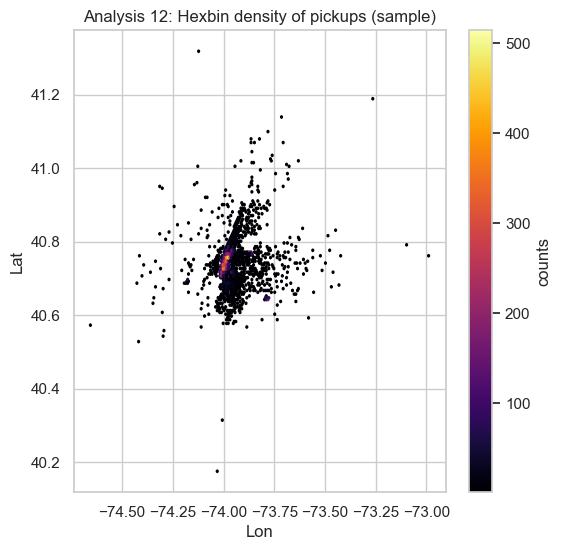

In [20]:
fig = plt.figure(figsize=(6,6))
plt.hexbin(sample['Lon'], sample['Lat'], gridsize=200, cmap='inferno', mincnt=1)
plt.title("Analysis 12: Hexbin density of pickups (sample)")
plt.xlabel("Lon"); plt.ylabel("Lat"); plt.colorbar(label='counts')
save_fig(fig, "12_hexbin_density")

### Analysis 13: Trips by hour & base (top 5 bases stacked)

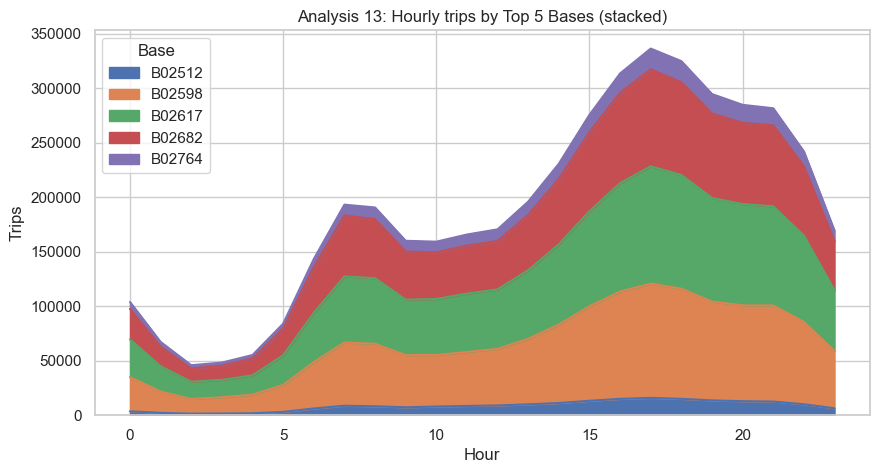

In [21]:
top5 = top_bases.index[:5]
tb = df[df['Base'].isin(top5)].groupby(['hour','Base']).size().unstack(fill_value=0)
fig = plt.figure(figsize=(10,5))
tb.plot(kind='area', stacked=True, ax=plt.gca())
plt.title("Analysis 13: Hourly trips by Top 5 Bases (stacked)")
plt.xlabel("Hour"); plt.ylabel("Trips")
save_fig(fig, "13_hourly_by_top5_bases")


### Analysis 14: Average trips per weekday

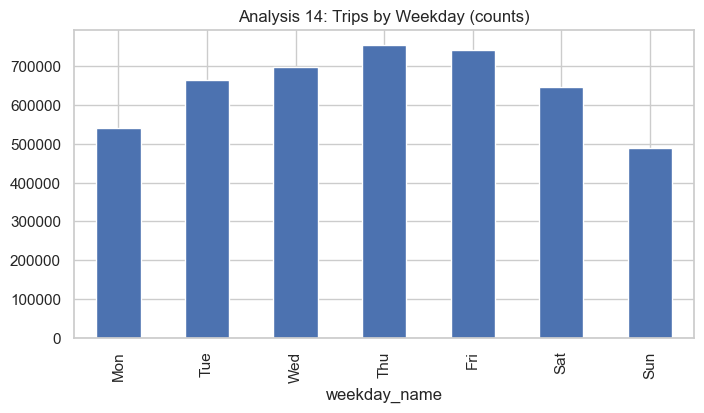

In [22]:
avg_wd = df.groupby('weekday_name').size().reindex(order_wd)
fig = plt.figure(figsize=(8,4))
avg_wd.plot(kind='bar')
plt.title("Analysis 14: Trips by Weekday (counts)")
save_fig(fig, "14_avg_trips_weekday")

### Analysis 15: Peak hour per weekday (argmax)

In [23]:
peak_per_weekday = df.groupby('weekday_name')['hour'].agg(lambda s: s.value_counts().idxmax()).reindex(order_wd)
print("Analysis 15: Peak hour per weekday:\n", peak_per_weekday)

Analysis 15: Peak hour per weekday:
 weekday_name
Mon    17
Tue    17
Wed    17
Thu    17
Fri    18
Sat    22
Sun    16
Name: hour, dtype: int32


### Analysis 16: Distribution of trip minutes (derived from times if possible)
# NOTE: original dataset does not have durations; skip duration-based stats.

In [24]:
print("Analysis 16: Duration not available in source dataset; skipped.")

Analysis 16: Duration not available in source dataset; skipped.


### Analysis 17: Weekend vs weekday volume

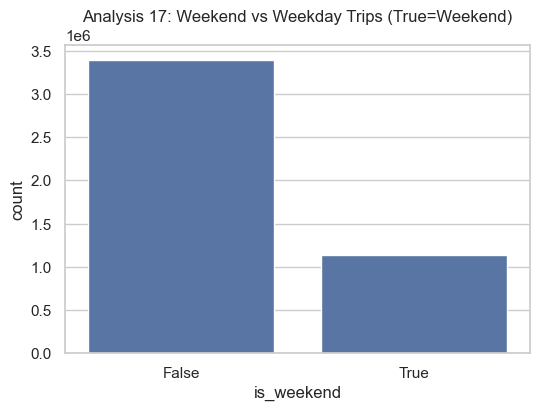

In [25]:
### df['is_weekend'] = df['weekday'].isin([5,6])
fig = plt.figure(figsize=(6,4))
sns.countplot(x='is_weekend', data=df)
plt.title("Analysis 17: Weekend vs Weekday Trips (True=Weekend)")
save_fig(fig, "17_weekend_vs_weekday")

### Analysis 18: Busiest day (date with highest pickups)

In [26]:
busiest_day = daily.idxmax()
print("Analysis 18: Busiest date:", busiest_day, "Trips:", daily.max())

Analysis 18: Busiest date: 2014-09-13 Trips: 43205


### Analysis 19: Hour-of-day distribution as percent (normalized)

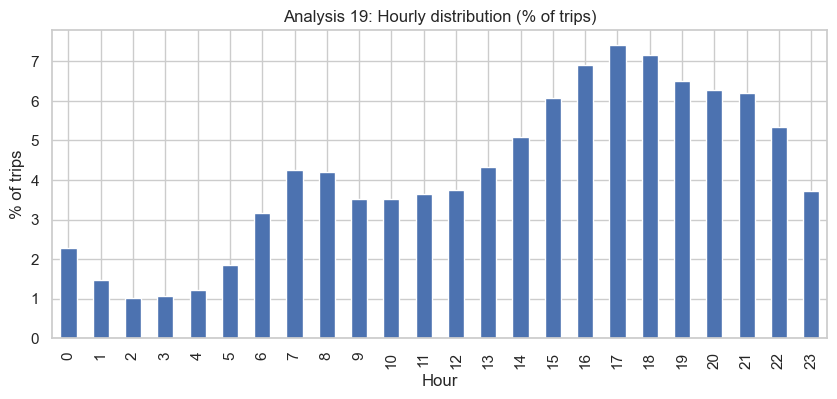

In [27]:
hour_pct = df['hour'].value_counts(normalize=True).sort_index()*100
fig = plt.figure(figsize=(10,4))
hour_pct.plot(kind='bar')
plt.title("Analysis 19: Hourly distribution (% of trips)")
plt.xlabel("Hour"); plt.ylabel("% of trips")
save_fig(fig, "19_hourly_pct")


### Analysis 20: Weekly seasonality — average trips per weekday by hour heatmap

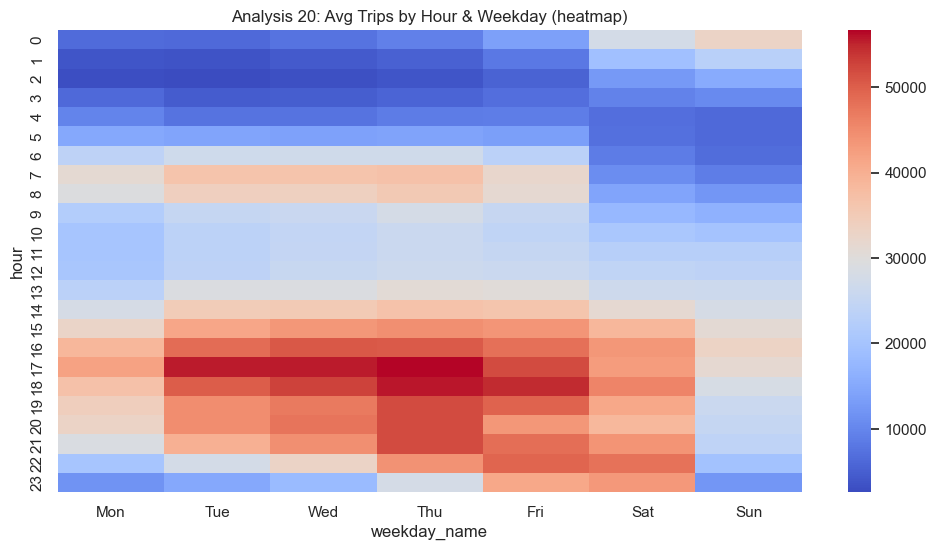

In [28]:
avg_hour_wd = df.groupby(['hour','weekday_name']).size().unstack().reindex(columns=order_wd).fillna(0)
fig = plt.figure(figsize=(12,6))
sns.heatmap(avg_hour_wd, cmap="coolwarm")
plt.title("Analysis 20: Avg Trips by Hour & Weekday (heatmap)")
save_fig(fig, "20_avg_hour_weekday_heatmap")

### Analysis 21: Top N pickup coordinate clusters (by counts) with lat/lon

In [29]:
top_hot_coords = df.groupby(['lat_round','lon_round']).size().reset_index(name='count').sort_values('count', ascending=False).head(10)
print("Analysis 21: Top 10 coordinate clusters:\n", top_hot_coords)

Analysis 21: Top 10 coordinate clusters:
        lat_round  lon_round  count
9704      40.645    -73.782  32580
41932     40.774    -73.872  24355
9870      40.646    -73.777  15983
41244     40.771    -73.866  12593
32608     40.740    -74.006  12544
41931     40.774    -73.873  12502
33226     40.742    -74.004  11898
40505     40.768    -73.862  11399
19897     40.695    -74.178  10321
10178     40.648    -73.783   7863


### Analysis 22: Trips per Base over time (monthly)

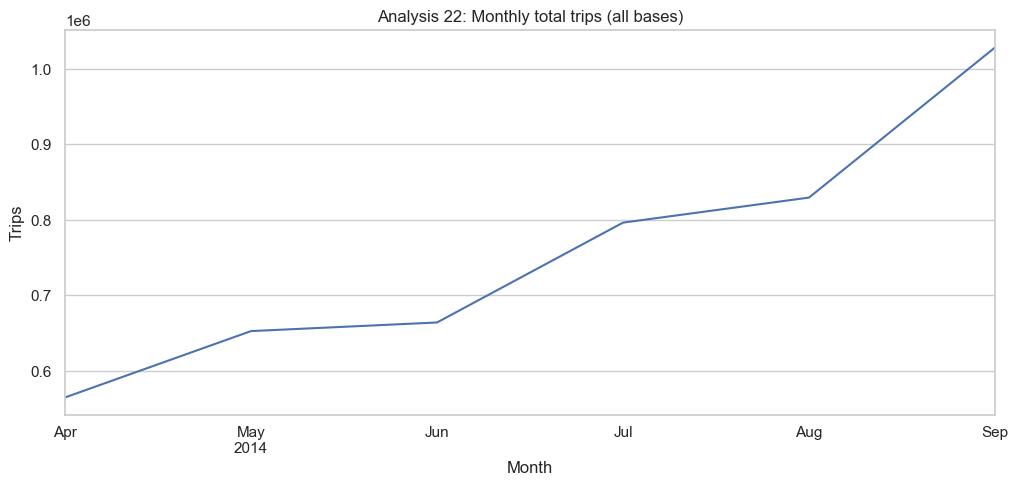

In [30]:
monthly_base = df.groupby([df['Date_Time'].dt.to_period('M'), 'Base']).size().unstack(fill_value=0)
fig = plt.figure(figsize=(12,5))
monthly_base.sum(axis=1).plot()
plt.title("Analysis 22: Monthly total trips (all bases)")
plt.xlabel("Month"); plt.ylabel("Trips")
save_fig(fig, "22_monthly_total_trips")

### Analysis 23: Bases ranked by variability (std dev over hours) — shows consistency vs bursts

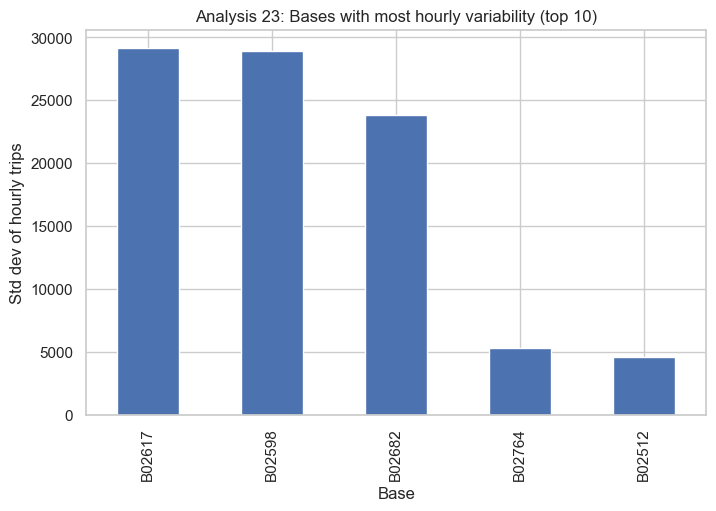

In [31]:
base_hour = df.groupby(['Base','hour']).size().unstack(fill_value=0)
base_std = base_hour.std(axis=1).sort_values(ascending=False).head(10)
fig = plt.figure(figsize=(8,5))
base_std.plot(kind='bar')
plt.title("Analysis 23: Bases with most hourly variability (top 10)")
plt.xlabel("Base"); plt.ylabel("Std dev of hourly trips")
save_fig(fig, "23_base_hour_variability")

### Analysis 24: Fraction of trips during late-night hours (0-4)

In [32]:
late_night = df[df['hour'].isin([0,1,2,3,4])]
print("Analysis 24: Late-night trips fraction:", len(late_night)/len(df))

Analysis 24: Late-night trips fraction: 0.07067090661965933


### Analysis 25: Most common pickup starting letters of Base id

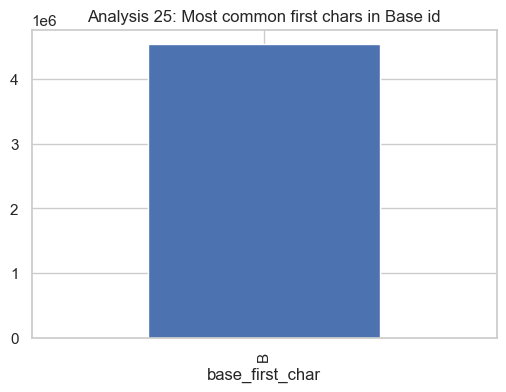

In [33]:
df['base_first_char'] = df['Base'].astype(str).str[0]
fig = plt.figure(figsize=(6,4))
df['base_first_char'].value_counts().head(10).plot(kind='bar')
plt.title("Analysis 25: Most common first chars in Base id")
save_fig(fig, "25_base_first_chars")

### Analysis 26: Time-of-day bucketization: morning/afternoon/evening/night counts

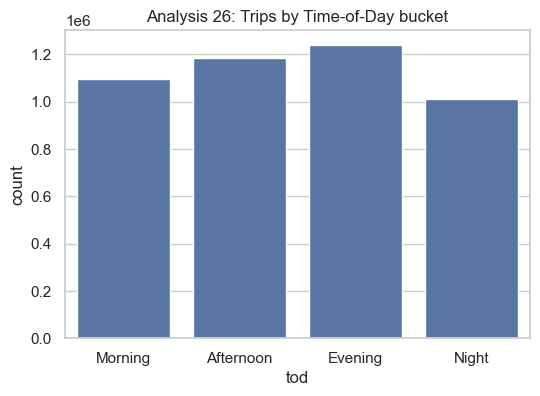

In [35]:
def tod_bucket(h):
    if 5 <= h < 12: return 'Morning'
    if 12 <= h < 17: return 'Afternoon'
    if 17 <= h < 21: return 'Evening'
    return 'Night'
df['tod'] = df['hour'].apply(tod_bucket)
fig = plt.figure(figsize=(6,4))
sns.countplot(x='tod', data=df, order=['Morning','Afternoon','Evening','Night'])
plt.title("Analysis 26: Trips by Time-of-Day bucket")
save_fig(fig, "26_tod_buckets")

### Analysis 27: Compare weekday vs weekend hourly profile (averaged)

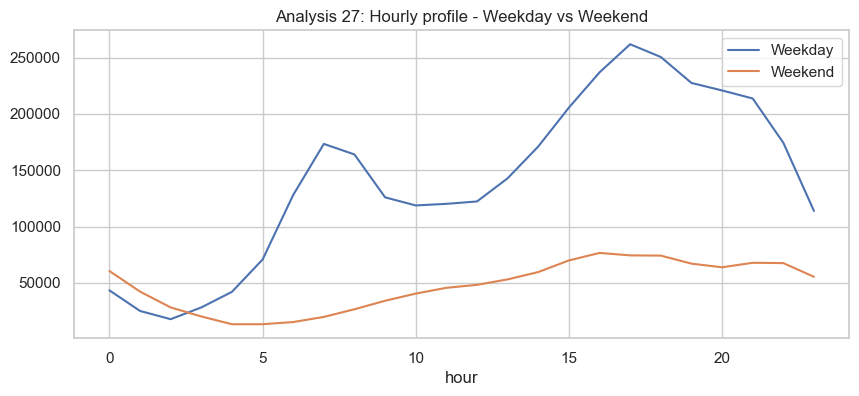

In [36]:
wd_profile = df[~df['is_weekend']].groupby('hour').size()
we_profile = df[df['is_weekend']].groupby('hour').size()
fig = plt.figure(figsize=(10,4))
wd_profile.plot(label='Weekday')
we_profile.plot(label='Weekend')
plt.legend(); plt.title("Analysis 27: Hourly profile - Weekday vs Weekend")
save_fig(fig, "27_weekday_weekend_profile")

### Analysis 28: Top bases monthly trend (top 5)

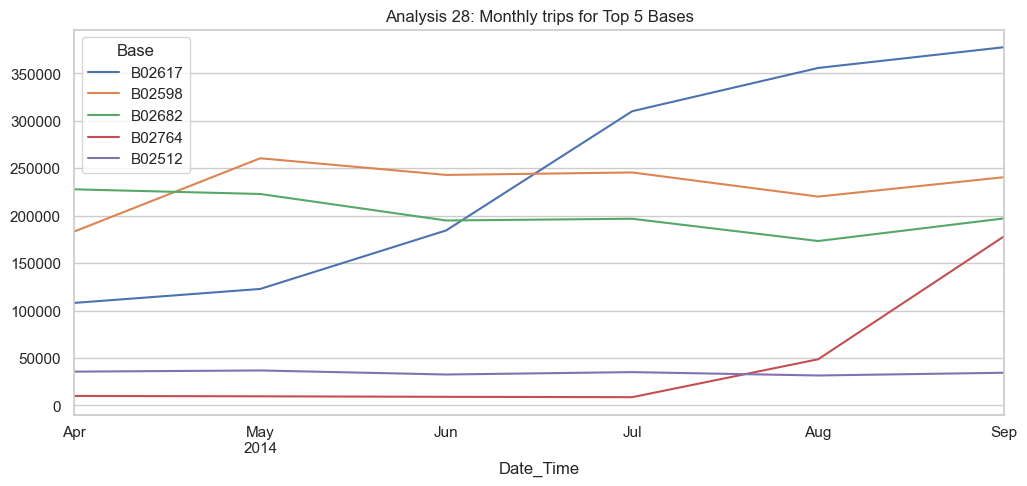

In [37]:
fig = plt.figure(figsize=(12,5))
monthly_base[top5].plot(ax=plt.gca())
plt.title("Analysis 28: Monthly trips for Top 5 Bases")
save_fig(fig, "28_monthly_top5_bases")

### Analysis 29: Frequency of unique hotspots (how many pickups per hotspot)

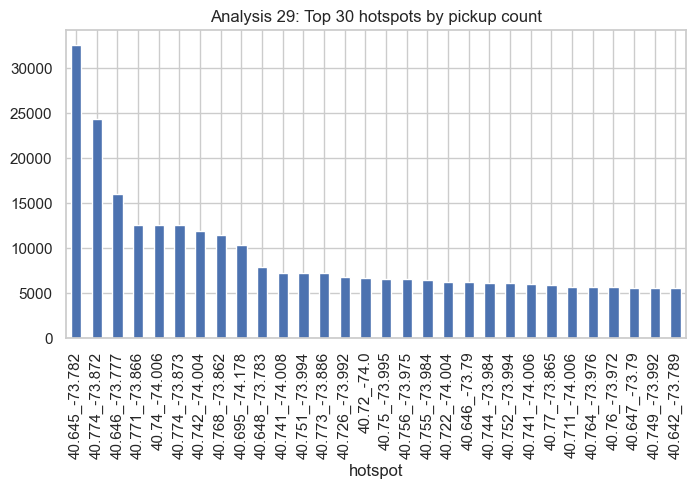

In [38]:
hotspot_counts = df['hotspot'].value_counts()
fig = plt.figure(figsize=(8,4))
hotspot_counts.head(30).plot(kind='bar')
plt.title("Analysis 29: Top 30 hotspots by pickup count")
save_fig(fig, "29_top30_hotspots")

### Analysis 30: Export simple summary CSV of top hotspots for external mapping

In [39]:
hotspot_summary = hotspot_counts.reset_index().rename(columns={'index':'hotspot','hotspot':'count'})
hotspot_summary.to_csv(os.path.join(OUT_DIR, "hotspot_summary_top_all.csv"), index=False)
print("Analysis 30: Hotspot summary exported to figs/hotspot_summary_top_all.csv")

Analysis 30: Hotspot summary exported to figs/hotspot_summary_top_all.csv


All analyses complete. Figures and hotspot CSV saved to ./figs/


In [ ]:
# ---------------------- ANALYSES ----------------------




# 


# 


#


# 


# 


# 


# 


# 


# 


# 


# 


# 

# 


# Analysis 15: Peak hour per weekday (argmax)


# 


# 


#


# 

# 


#


#


# 


# 

# 


# 


# 

# 

# 

# 


# Done

